# Data Management

In [802]:
import numpy as np
import pandas as pd
import seaborn as sns

In [803]:
data = {
    'name': ['ju', 'ma', 'lo', 'fi', 'xa', 'pa', 'pe', 'pe', 'jb', 'mp', 'ka', 'te', 'ko'],
    'age': [25, 36, 18, 18, 25, 38, 40, 40, 18, 40, np.nan, 180, 60],
    'time_since_birth': [25, 36, 18, 18, 25, 38, 40, 40, 18, 40, np.nan, np.nan, 60],
    'group': [2, 2, 1, 1, 2, 2, 2, 2, np.nan, np.nan, np.nan, 1, 2],
    'country': ['fr', 'gb', 'gb', 'fr', 'fr', 'es', 'it', 'it', 'gb', 'fr', 'es', 'gb', 'it'],
    'europe': [True, True, True, True, True, True, True, True, True, True, True, True, True],
    'salary': [1800, 3000, 1500, 1500, 1800, 7500, 8000, 8000, np.nan, np.nan, np.nan, 4000, 20000],
    'patrimony': [3000, 7000, 2000, 60000, 8000000, 6000, 4000, 4000, np.nan, np.nan, np.nan, 4000, 7000],
    'weight': [70, np.nan, np.nan, np.nan, np.nan, np.nan, 90, 90, 60, np.nan, np.nan, np.nan, np.nan],
    'size': [175, 180, 150, np.nan, np.nan, 170, 170, 170, np.nan, np.nan, np.nan, 150, 180],
    'comment': [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    'voted': [True, np.nan, True, np.nan, True, np.nan, True, True, np.nan, np.nan, True, True, True],
}
df = pd.DataFrame(data)
df

,name,age,time_since_birth,group,country,europe,salary,patrimony,weight,size,comment,voted
0,ju,25.0,25.0,2.0,fr,True,1800.0,3000.0,70.0,175.0,NaN,True
1,ma,36.0,36.0,2.0,gb,True,3000.0,7000.0,NaN,180.0,NaN,NaN
2,lo,18.0,18.0,1.0,gb,True,1500.0,2000.0,NaN,150.0,NaN,True
3,fi,18.0,18.0,1.0,fr,True,1500.0,60000.0,NaN,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,True,1800.0,8000000.0,NaN,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,True,7500.0,6000.0,NaN,170.0,NaN,NaN
6,pe,40.0,40.0,2.0,it,True,8000.0,4000.0,90.0,170.0,NaN,True
7,pe,40.0,40.0,2.0,it,True,8000.0,4000.0,90.0,170.0,NaN,True
8,jb,18.0,18.0,NaN,gb,True,NaN,NaN,60.0,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,True,NaN,NaN,NaN,NaN,NaN,NaN


- *europe* is constant: must be dropped
- *time_since_birth* duplicate of *age*: must be dropped
- *weight* has mostly NAs, could be dropped
- *comment* has only NA values: must be dropped
- *group* has NA values: it is possible to perfectly reconstruct the values here
- *patrimony* has NA values: this will require a regression for getting an approximate reconstruction

## Select features
(variables / columns)

### Drop constants

In [804]:
# Detect columns with a constant value
const_col = df.nunique(dropna=False) == 1
const_col

name                False
age                 False
time_since_birth    False
group               False
country             False
europe               True
salary              False
patrimony           False
weight              False
size                False
comment              True
voted               False
dtype: bool

In [805]:
# Drop these constant columns
df = df.T[~const_col].T
df

,name,age,time_since_birth,group,country,salary,patrimony,weight,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,70.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,NaN,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,NaN,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,NaN,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,60.0,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN,NaN


### Drop duplicates

In [806]:
# See which column values are duplicated by transposing the matrix
dup_cols = df.T.duplicated()
dup_cols

name                False
age                 False
time_since_birth    False
group               False
country             False
salary              False
patrimony           False
weight              False
size                False
voted               False
dtype: bool

In [807]:
# Drop these duplicated columns by transposing the cleaned DataFrame
df = df.T.drop_duplicates().T
df

,name,age,time_since_birth,group,country,salary,patrimony,weight,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,70.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,NaN,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,NaN,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,NaN,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,60.0,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN,NaN


### Drop columns with excessive proportion of missing values

In [808]:
# Great package for missing values analysis
import missingno

<AxesSubplot:>

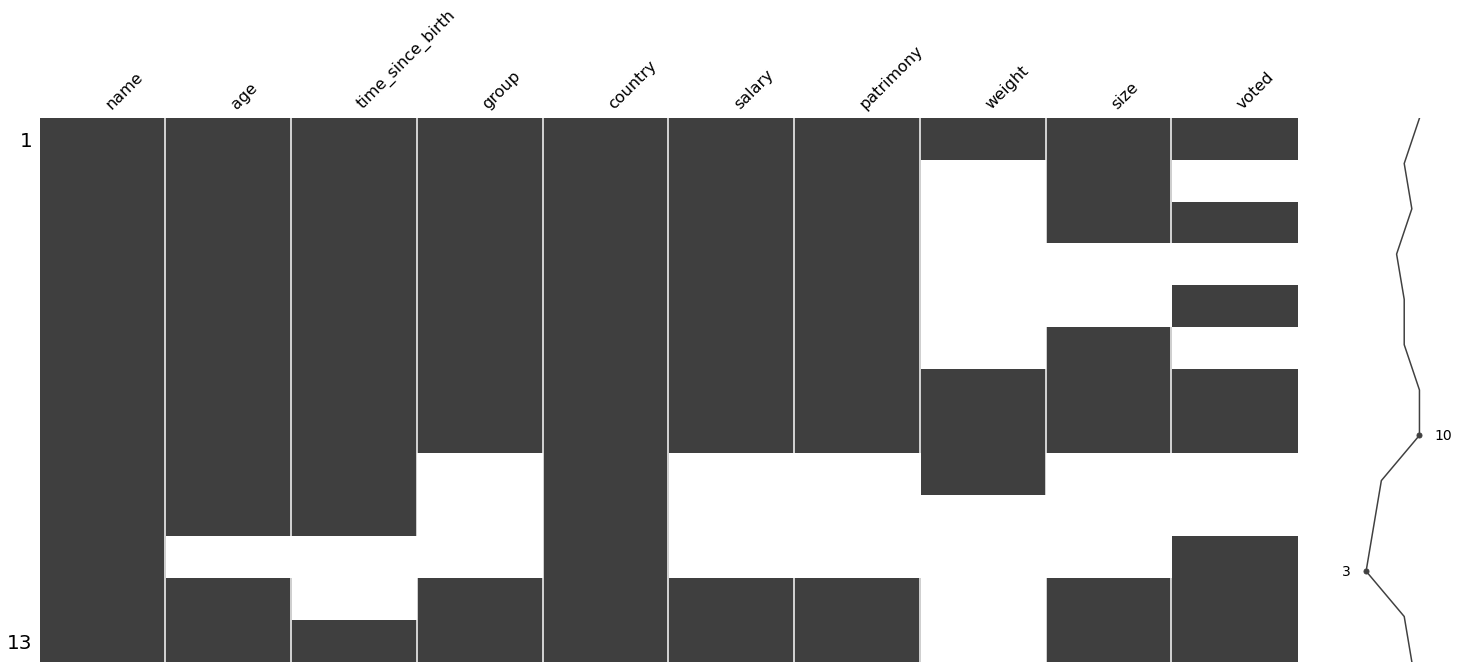

In [809]:
missingno.matrix(df)

#### Column containing only missing values (NA)

In [810]:
# See which columns have only NA values
df.isna().all()


name                False
age                 False
time_since_birth    False
group               False
country             False
salary              False
patrimony           False
weight              False
size                False
voted               False
dtype: bool

In [811]:
# Drop columns with only NA values
df.dropna(axis=1, how='all', inplace=True)
df

,name,age,time_since_birth,group,country,salary,patrimony,weight,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,70.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,NaN,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,NaN,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,NaN,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,90.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,60.0,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN,NaN


#### Excessive proportion of missing values

In [812]:
df.isna().mean()

name                0.000000
age                 0.076923
time_since_birth    0.153846
group               0.230769
country             0.000000
salary              0.230769
patrimony           0.230769
weight              0.692308
size                0.384615
voted               0.384615
dtype: float64

In [813]:
# Create a mask for columns with more than 50% of NAs
excessive_na = df.isna().mean() > .5
excessive_na

name                False
age                 False
time_since_birth    False
group               False
country             False
salary              False
patrimony           False
weight               True
size                False
voted               False
dtype: bool

In [814]:
# Drop these columns
df = df.T[~excessive_na].T
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
7,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN


### Excessive correlation between features

In [815]:
df_no_missing_values = df.fillna(method='bfill')   # Don't replace NA like this, just for the example
correlation_matrix = df_no_missing_values.corr()
corr_matrix_clean = (correlation_matrix*100).round(2)
corr_matrix_clean

,age,time_since_birth,group,salary,patrimony,size,voted
age,100.00,79.84,-34.76,6.83,-16.18,-42.04,NaN
time_since_birth,79.84,100.00,6.73,57.83,-22.65,-3.34,NaN
group,-34.76,6.73,100.00,41.35,26.56,85.92,NaN
salary,6.83,57.83,41.35,100.00,-21.23,39.17,NaN
patrimony,-16.18,-22.65,26.56,-21.23,100.00,14.33,NaN
size,-42.04,-3.34,85.92,39.17,14.33,100.00,NaN
voted,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

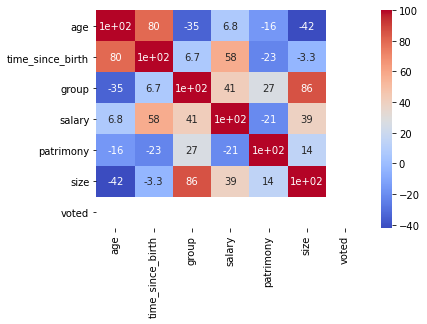

In [816]:
sns.heatmap(corr_matrix_clean, cmap='coolwarm', annot=True)

- Diagonal has no meaning in the reading of a correlation matrix
- Values above +60 (or under -60%) start to be annoying (60% of information is redundant)
- Here: group has a high correlation with both age (+76%) and size (+95%)
- If used in a model*, the "group" variable should be dropped (otherwise it can be useful)

\* The problem in a model is the over-representation of a same information. Leading to bias, decreased performance on out-of-sample (real life) data.

## Drop poor rows

### Drop duplicates

In [817]:
# See which row values are duplicated
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
dtype: bool

In [818]:
# Drop these duplicated rows
df.drop_duplicates(inplace=True)
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
8,jb,18.0,18.0,NaN,gb,NaN,NaN,NaN,NaN
9,mp,40.0,40.0,NaN,fr,NaN,NaN,NaN,NaN
10,ka,NaN,NaN,NaN,es,NaN,NaN,NaN,True


### Drop rows with excessing NA proportion

In [819]:
df.T.isna().mean()

0     0.000000
1     0.111111
2     0.000000
3     0.222222
4     0.111111
5     0.111111
6     0.000000
8     0.555556
9     0.555556
10    0.666667
11    0.111111
12    0.000000
dtype: float64

In [820]:
# Create a mask for rows with more than 50% of NAs
excessive_na = df.T.isna().mean() > .5
excessive_na

0     False
1     False
2     False
3     False
4     False
5     False
6     False
8      True
9      True
10     True
11    False
12    False
dtype: bool

In [821]:
# Drop these columns
df = df[~excessive_na]
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,180.0,True


## Impute NAs
(replace missing values)

### Missing can be the information
Ask if someone is sleeping, if there is no answer (np.nan), it means yes.

In [822]:
rows_with_na = df.isna().any(axis=1)
df[rows_with_na]

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,NaN
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,NaN
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,NaN
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True


In [823]:
df['voted'].value_counts()

True    6
Name: voted, dtype: int64

- *voted* contains only *True* and *Nan* values. Thus *Nan* might here be replaced by *False*.
- In this case the missing value is an actual information

In [824]:
# Replace Nan by False (in 'voted' variable only)
df.loc[df['voted'].isna(), 'voted'] = False

/Users/alexisbogroff/Installs/miniforge3/envs/eda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/alexisbogroff/Installs/miniforge3/envs/eda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [825]:
df['voted'].value_counts()

True     6
False    3
Name: voted, dtype: int64

### Standard reconstruction methods

#### Constant value
- average
- median

In [826]:
remaining_na_rows = df.isna().any(axis=1)
df[remaining_na_rows]

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True


In [827]:
size_mean = df['size'].mean()
size_median = df['size'].median()
print(size_mean)
print(size_median)

167.85714285714286
170.0


In [828]:
# Replace Nan by the mean
df['size'].fillna(size_mean)

0     175.000000
1     180.000000
2     150.000000
3     167.857143
4     167.857143
5     170.000000
6     170.000000
11    150.000000
12    180.000000
Name: size, dtype: float64

In [829]:
# Apply the modification on the actual DataFrame
# df['size'] =  df['size'].fillna(size_mean)

#### Ffill, bfill
Forward, backward fill

In [830]:
df['size'].fillna(method='ffill')

0     175.0
1     180.0
2     150.0
3     150.0
4     150.0
5     170.0
6     170.0
11    150.0
12    180.0
Name: size, dtype: float64

- Line 4 is replaced by 190, the previous value (row 3 at 190) has been forwarded

In [831]:
df['size'].fillna(method='bfill')

0     175.0
1     180.0
2     150.0
3     170.0
4     170.0
5     170.0
6     170.0
11    150.0
12    180.0
Name: size, dtype: float64

- Line 4 is replaced by 170, the next value (row 5) has been backwarded

### Advanced reconstruction methods


In [832]:
# Cast variables by their current clean type before using advanced imputing methods
# Otherwise, many columns are of "object" type, and block some simple computations
df = df.infer_objects()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 12
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              9 non-null      object 
 1   age               9 non-null      float64
 2   time_since_birth  8 non-null      float64
 3   group             9 non-null      float64
 4   country           9 non-null      object 
 5   salary            9 non-null      float64
 6   patrimony         9 non-null      float64
 7   size              7 non-null      float64
 8   voted             9 non-null      bool   
dtypes: bool(1), float64(6), object(2)
memory usage: 657.0+ bytes


The types are correctly casted:
- numerical variables are of "float" type
- voted is a boolean
- name and country are strings (can only be object for a DataFrame)

#### Groupby

In [833]:
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,False
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,NaN,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,NaN,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,False
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,180.0,True


- Previously, we saw that age and size are correlated (+71%)
- See that *'xa'* is 25 years old, like *'ju'*
- Could be great to get the same size no?
- Let's group by *age* to impute *size* Nan


In [834]:
df_mean_by_age = df.groupby('age').mean()
df_mean_by_age

,time_since_birth,group,salary,patrimony,size,voted
age,,,,,,
18.0,18.0,1.0,1500.0,31000.0,150.0,0.5
25.0,25.0,2.0,1800.0,4001500.0,175.0,1.0
36.0,36.0,2.0,3000.0,7000.0,180.0,0.0
38.0,38.0,2.0,7500.0,6000.0,170.0,0.0
40.0,40.0,2.0,8000.0,4000.0,170.0,1.0
60.0,60.0,2.0,20000.0,7000.0,180.0,1.0
180.0,NaN,1.0,4000.0,4000.0,150.0,1.0


In [835]:
nan_age = df[remaining_na_rows]['age']
nan_size_to_impute = df_mean_by_age.loc[nan_age]['size']
nan_size_to_impute

age
18.0     150.0
25.0     175.0
180.0    150.0
Name: size, dtype: float64

In [836]:
df.fillna(df.groupby('age').transform('mean'))

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,False
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,150.0,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,175.0,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,False
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,150.0,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,180.0,True


#### Models

- Impute using automatic methods that take into account more complex patterns
    - Unsupervised models to create smart grouping
    - Supervised models (built for the purpose of imputation: KnnImputer, any other model)

In [837]:
df._get_numeric_data()

,age,time_since_birth,group,salary,patrimony,size,voted
0,25.0,25.0,2.0,1800.0,3000.0,175.0,True
1,36.0,36.0,2.0,3000.0,7000.0,180.0,False
2,18.0,18.0,1.0,1500.0,2000.0,150.0,True
3,18.0,18.0,1.0,1500.0,60000.0,NaN,False
4,25.0,25.0,2.0,1800.0,8000000.0,NaN,True
5,38.0,38.0,2.0,7500.0,6000.0,170.0,False
6,40.0,40.0,2.0,8000.0,4000.0,170.0,True
11,180.0,NaN,1.0,4000.0,4000.0,150.0,True
12,60.0,60.0,2.0,20000.0,7000.0,180.0,True


In [838]:
from sklearn.impute import KNNImputer

In [839]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
na_prediction = imputer.fit_transform(df._get_numeric_data())
df_filled = pd.DataFrame(na_prediction, columns=df._get_numeric_data().columns)
df_filled

,age,time_since_birth,group,salary,patrimony,size,voted
0,25.0,25.0,2.0,1800.0,3000.0,175.0,1.0
1,36.0,36.0,2.0,3000.0,7000.0,180.0,0.0
2,18.0,18.0,1.0,1500.0,2000.0,150.0,1.0
3,18.0,18.0,1.0,1500.0,60000.0,175.0,0.0
4,25.0,25.0,2.0,1800.0,8000000.0,180.0,1.0
5,38.0,38.0,2.0,7500.0,6000.0,170.0,0.0
6,40.0,40.0,2.0,8000.0,4000.0,170.0,1.0
7,180.0,30.5,1.0,4000.0,4000.0,150.0,1.0
8,60.0,60.0,2.0,20000.0,7000.0,180.0,1.0


In [840]:
df['size'] = df_filled['size']

In [841]:
df

,name,age,time_since_birth,group,country,salary,patrimony,size,voted
0,ju,25.0,25.0,2.0,fr,1800.0,3000.0,175.0,True
1,ma,36.0,36.0,2.0,gb,3000.0,7000.0,180.0,False
2,lo,18.0,18.0,1.0,gb,1500.0,2000.0,150.0,True
3,fi,18.0,18.0,1.0,fr,1500.0,60000.0,175.0,False
4,xa,25.0,25.0,2.0,fr,1800.0,8000000.0,180.0,True
5,pa,38.0,38.0,2.0,es,7500.0,6000.0,170.0,False
6,pe,40.0,40.0,2.0,it,8000.0,4000.0,170.0,True
11,te,180.0,NaN,1.0,gb,4000.0,4000.0,NaN,True
12,ko,60.0,60.0,2.0,it,20000.0,7000.0,NaN,True


## Drop outliers

### Abberations to delete

<AxesSubplot:>

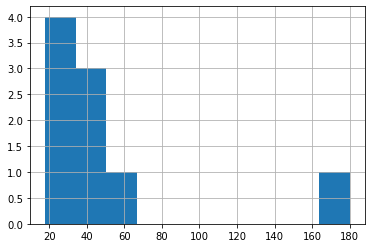

In [842]:
# See the distribution
df['age'].hist()

<AxesSubplot:>

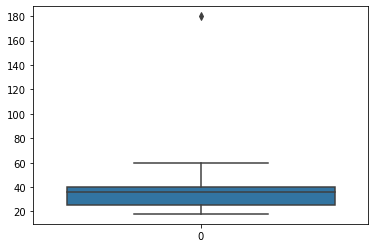

In [843]:
# Seaborn boxplots detect outliers (using IQR - Interquartile range)
sns.boxplot(data=df['age'], orient='v')

- Quantitative method: One individual is detected as outlier (extremely positive value)
- Domain expertise: It is general knowledge that no one is 180 years old
- Conclusion: this should be deleted as it misleads the computations

In [844]:
ma_180_yo = df['age'] == 180
ma_180_yo

0     False
1     False
2     False
3     False
4     False
5     False
6     False
11     True
12    False
Name: age, dtype: bool

In [845]:
df.drop(df.loc[ma_180_yo].index, inplace=True)

### Extreme values too keep

<AxesSubplot:>

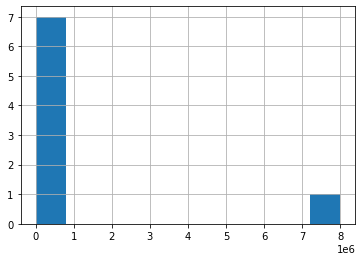

In [846]:
df['patrimony'].hist()

<AxesSubplot:>

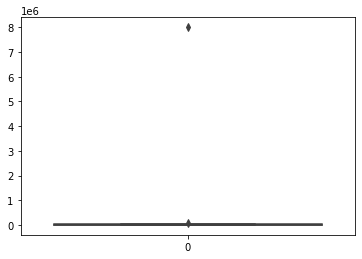

In [847]:
sns.boxplot(data=df['patrimony'], orient='v')

- Quantitative method: One individual is detected as outlier (extremely positive value)
- Domain expertise: It is general knowledge that richest people possess billions
- Conclusion:
    - For analysis purpose this individual (row) should not be deleted
    - To train a model this individual should (often) be deleted as it differs greatly from the remaining data. Many models would be incapable to understand the data (like a linear regression). The model performance would be disastrous

### Variables to transform

#### Logarithm for exponential and power variables

<AxesSubplot:>

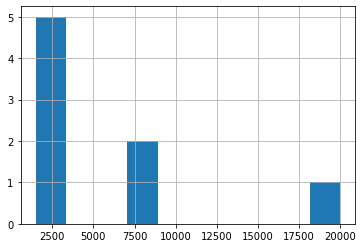

In [848]:
df['salary'].hist()

In [851]:
# Add log salary to DataFrame
df['salary_log'] = np.log(df['salary'])

<AxesSubplot:>

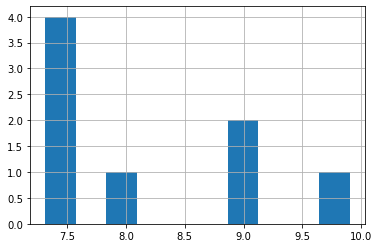

In [852]:
df['salary_log'].hist()

- There are no more extreme values in *salary_log*
- Relations are easier to understand for many models when the distribution is closer to a normal law
- It is however more difficult to interpret as a human

#### Center and reduce

Many models work better with centered and reduced data. It is due to several artifacts and as stated above, models work better with data that more closely ressemble to a normal distribution.


Center and reduce:
- Center: transform data to get average = 0
- Reduce: transform data to get variance = 0

<AxesSubplot:>

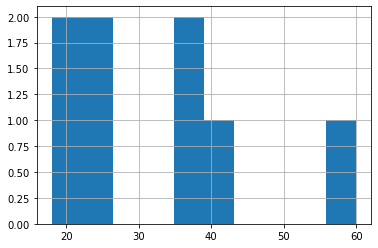

In [854]:
df['age'].hist()

In [855]:
age_centered = df['age'] - df['age'].mean()
age_centered

0     -7.5
1      3.5
2    -14.5
3    -14.5
4     -7.5
5      5.5
6      7.5
12    27.5
Name: age, dtype: float64

In [856]:
age_centered.mean()

0.0

In [858]:
age_centered_reduced = age_centered / age_centered.std() 
age_centered_reduced

0    -0.532618
1     0.248555
2    -1.029727
3    -1.029727
4    -0.532618
5     0.390586
6     0.532618
12    1.952931
Name: age, dtype: float64

In [860]:
age_centered_reduced.std()

1.0

<AxesSubplot:>

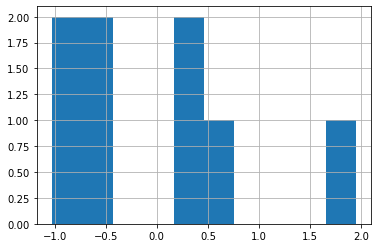

In [861]:
age_centered_reduced.hist()